In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df = pd.read_csv("Uber Request Data.csv")

data_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
data_df.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [4]:
data_df.shape

(6745, 6)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [6]:
data_df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [7]:
data_df.rename(columns={'Request id':"request_id" , 'Pickup point':"pickup_point", 'Driver id':"driver_id", 'Status':"status",
       'Request timestamp':"request_timestamp", 'Drop timestamp':"drop_timestamp"},inplace=True)

data_df

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [8]:
data_df.isnull().sum()/data_df.shape[0]

request_id           0.000000
pickup_point         0.000000
driver_id            0.392884
status               0.000000
request_timestamp    0.000000
drop_timestamp       0.580282
dtype: float64

In [9]:
data_df.describe(include="all")

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,11/7/2016 19:02,11/7/2016 13:00
freq,NaN,3507,NaN,2831,6,4
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN


In [10]:
data_df.pickup_point.unique()

array(['Airport', 'City'], dtype=object)

In [11]:
data_df.status.unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [12]:
data_df.request_timestamp = pd.to_datetime(data_df.request_timestamp)

data_df.drop_timestamp = pd.to_datetime(data_df.drop_timestamp)

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   request_id         6745 non-null   int64         
 1   pickup_point       6745 non-null   object        
 2   driver_id          4095 non-null   float64       
 3   status             6745 non-null   object        
 4   request_timestamp  6745 non-null   datetime64[ns]
 5   drop_timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


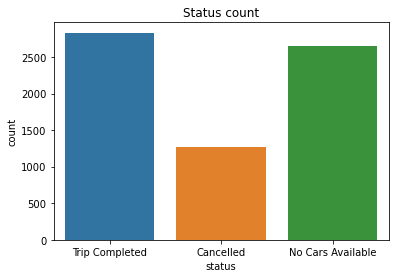

In [13]:
sns.countplot(x="status",data=data_df)
plt.title("Status count")
plt.show()

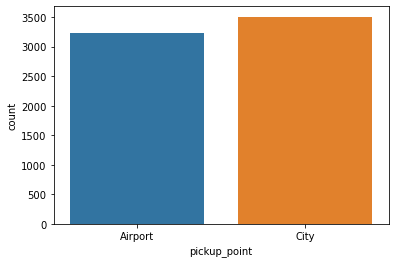

In [14]:
sns.countplot(x="pickup_point",data=data_df);

In [15]:
import datetime as dt

In [16]:
data_df["week_day"] = data_df.request_timestamp.dt.day_name()

data_df.head()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,week_day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Monday
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Monday
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Wednesday
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Wednesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Wednesday


Looking for the trends in the data

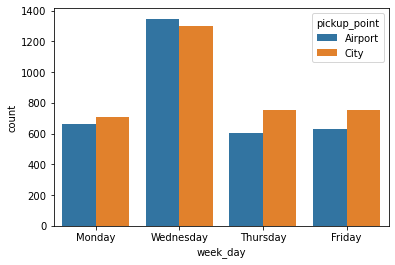

In [17]:
sns.countplot(x="week_day",data=data_df,hue="pickup_point");

<AxesSubplot:xlabel='week_day', ylabel='count'>

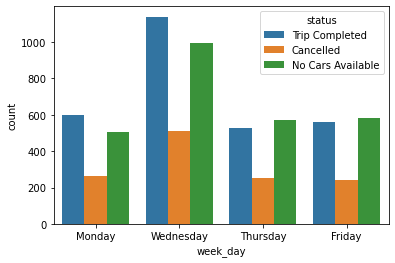

In [18]:
sns.countplot(x="week_day",data=data_df,hue="status")

We can see that there is a large non-availability of cabs that can be benifited, if known earlier

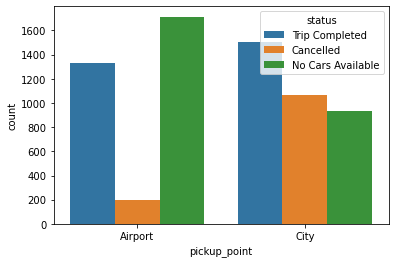

In [19]:
# Cars availability with respect to pickup point

sns.countplot(x="pickup_point",hue="status",data=data_df);

In [20]:
data_df["hourofday"]=data_df.request_timestamp.dt.hour

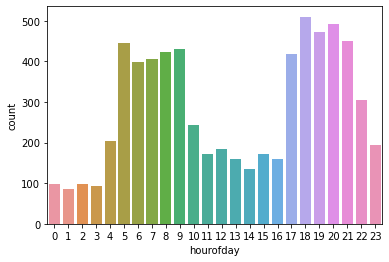

In [21]:
sns.countplot(x="hourofday",data=data_df);

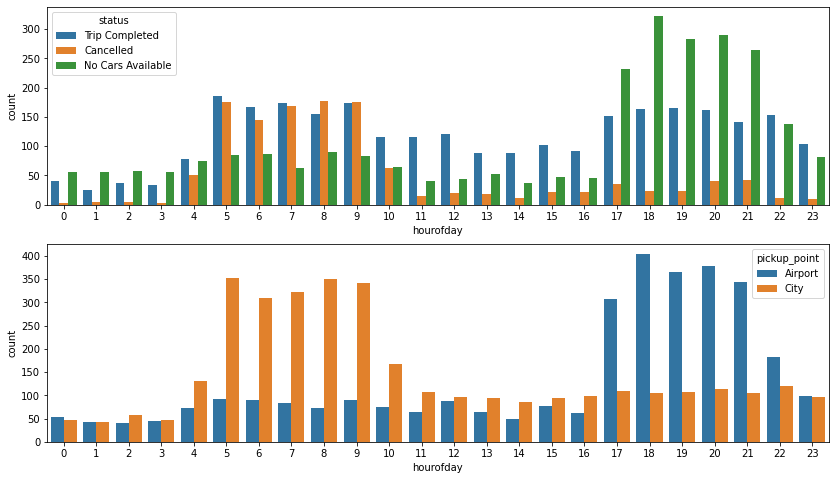

In [23]:
plt.figure(figsize=[14,8])
plt.subplot(2,1,1)
sns.countplot(x="hourofday",data=data_df,hue="status")
plt.subplot(2,1,2)
sns.countplot(x="hourofday",data=data_df,hue="pickup_point");

**from the above charts we can see their is a gap in supply and demand as we can see their is less availability of cabs during night at airports where there is a good amount of footfall(available business) that if predicted early and sent as notification to the drivers can be solved.**